<a href="https://colab.research.google.com/github/rodrigomariamorgao/portfolio_data_science/blob/master/Panorama_de_casos_do_COVID_19_no_Brasil_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="BannerDataScience" width="100%" src="https://raw.githubusercontent.com/rodrigomariamorgao/portfolio_data_science/master/banner.png">

---
  

# Panorama de casos do COVID-19 no Brasil - 06/2020

A **COVID-19** é uma doença causada pelo coronavírus **SARS-CoV-2**, que apresenta um quadro clínico que varia de infecções assintomáticas a quadros respiratórios graves. De acordo com a Organização Mundial de Saúde (OMS), a maioria dos pacientes com COVID-19 (cerca de 80%) podem ser assintomáticos e cerca de 20% dos casos podem requerer atendimento hospitalar por apresentarem dificuldade respiratória e desses casos aproximadamente 5% podem necessitar de suporte para o tratamento de insuficiência respiratória (suporte ventilatório).

---

**O que é o coronavírus?** É uma família de vírus que causam infecções respiratórias.

**O novo agente do coronavírus foi descoberto em 31/12/19** após casos registrados na China. Provoca a doença chamada de coronavírus (COVID-19), transmissível principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa, como vimos no parágrafo anterior.

---

Infelizmente não se sabe muita coisa a respeito de COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda inconclusivos.

<center><img alt="o" width="50%" src="https://www.rbsdirect.com.br/imagesrc/25638207.jpg"></center>

A fim de elevar a consciência situacional a respeito de COVID-19 globalmente e no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados analisados neste artigo foram extraídos da *homepage* [Our World in Data](https://ourworldindata.org/), onde o mesmo exibe a seguinte descrição de seu objetivo:
***... is about Research and data to make progress against the world’s largest problems.*** (*é sobre Pesquisa e dados para progredir contra os maiores problemas do mundo*). Portanto, vimos que a cultura de dados prevalece como uma arma poderosa no estudo e combate a pandemia que vivemos.

Esses dados publicados encontram-se armazenados no repositório [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data) do projeto. Como o arquivo é atualizado constantemente, iremos efetuar o download da versão mais atual até o momento para o manuseio e análise deste artigo.

Este é um *dataset* bem completo, pois abrange dados mundiais juntamente com *features* onde podemos realizar comparação entre países.

Há pouco tivemos divergências entre o alto escalão do governo, onde foi publicado inclusive que teríamos uma omissão dos casos em relação a realidade. Infelizmente essa é uma prática onde o Brasil deixará de evoluir no combate a doença, mas o [parlamento](https://www.camara.leg.br/noticias/669282-comissao-mista-fara-contagem-paralela-de-casos-e-obitos-relacionados-a-covid-19/) está trabalhando para continuar informando o povo brasileiro da realidade em que vivemos nessa pandemia. O ministério da saúde mantém um [dashboard](https://covid.saude.gov.br/) interativo com os dados de COVID-19 no Brasil, caso tenham interesse em visualizá-lo.

### Importando os dados do COVID-19

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# importar o dataset COVID-19 para um DataFrame
DATA_PATH = 'https://raw.githubusercontent.com/rodrigomariamorgao/portfolio_data_science/master/datasets/owid-covid-data.csv'
df = pd.read_csv(DATA_PATH)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# listar as 5 primeiras entradas do dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [3]:
# listar as 5 últimas entradas do dataset
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
24942,OWID_WRL,NaN,World,2020-06-17,8141722.0,141305.0,445380.0,6851.0,1044.507,18.128,57.138,0.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24943,OWID_WRL,NaN,World,2020-06-18,8318148.0,176426.0,450630.0,5250.0,1067.141,22.634,57.812,0.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24944,OWID_WRL,NaN,World,2020-06-19,8456815.0,138667.0,456956.0,6326.0,1084.931,17.790,58.623,0.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24945,OWID_WRL,NaN,World,2020-06-20,8634087.0,177272.0,461982.0,5026.0,1107.673,22.742,59.268,0.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24946,OWID_WRL,NaN,World,2020-06-21,8795672.0,161585.0,466189.0,4207.0,1128.403,20.730,59.808,0.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


In [4]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

Variáveis:	 34

Entradas:	 24947


Podemos verificar que nosso *dataset* possuí 34 variáveis e 24947 entradas. Detalharemos a seguir o significado de cada variável de nosso *dataset*.

### Dicionário de Variáveis
As variáveis (também podemos chamá-las de colunas ou *features*) serão detalhadas abaixo, para nível de conhecimento de nosso *dataset*.

Esta etapa tem por objetivo demostrar a situação inicial dos dados e permitir um entendimento de como os mesmos estão estruturados.
1. `iso_code` - [Código ISO 3166-1 alfa-3](https://pt.wikipedia.org/wiki/ISO_3166-1_alfa-3)
1. `continent` -  códigos de países de três letras
1. `location` - continente da localização geográfica
1. `date` - data de observação
1. `total_cases` - total de casos confirmados de COVID-19
1. `new_cases` - novos casos confirmados de COVID-19
1. `total_deaths` - total de mortes atribuídas ao COVID-19
1. `new_deaths` - novas mortes atribuídas ao COVID-19
1. `total_cases_per_million` - total de casos confirmados de COVID-19 por 1.000.000 pessoas
1. `new_cases_per_million` - novos casos confirmados de COVID-19 por 1.000.000 pessoas
1. `total_deaths_per_million` - total de mortes atribuídas ao COVID-19 por 1.000.000 pessoas
1. `new_deaths_per_million` - novas mortes atribuídas ao COVID-19 por 1.000.000 pessoas
1. `total_tests` - total de testes para COVID-19
1. `new_tests` - novos testes para COVID-19
1. `new_tests_smoothed` - novos testes para COVID-19 (7 dias suavizadas). Para países que não relatam dados de teste diariamente, assumimos que os testes mudaram igualmente diariamente durante quaisquer períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que é então mediado ao longo de uma janela de 7 dias.
1. `total_tests_per_thousand` - total de testes para COVID-19 por 1.000 pessoas
1. `new_tests_per_thousand` - novos testes para COVID-19 por 1.000 pessoas
1. `new_tests_smoothed_per_thousand` - novos testes para COVID-19 (7 dias suavizados) por 1.000 pessoas
1. `tests_units` - unidades usadas pelo local para relatar seus dados de teste
1. `stringency_index` - índice de severidade de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, redimensionados para um valor de 0 a 100 (100 = resposta mais rigorosa)
1. `population` - população em 2020
1. `population_density` - número de pessoas divididas por área terrestre, medida em quilômetros quadrados, ano mais recente disponível
1. `median_age` - idade mediana da população, projeção da ONU para 2020
1. `aged_65_older` - parcela da população com 65 anos ou mais, ano mais recente disponível
1. `aged_70_older` - parcela da população com 70 anos ou mais em 2015
1. `gdp_per_capita` - PIB (Produto Interno Bruto) na paridade do poder aquisitivo (dólares internacionais constantes de 2011), ano mais recente disponível
1. `extreme_poverty` - parcela da população vivendo em extrema pobreza, ano mais recente disponível desde 2010
1. `cvd_death_rate` - taxa de mortalidade por doenças cardiovasculares em 2017
1. `diabetes_prevalence` - prevalência de diabetes (% da população de 20 a 79 anos) em 2017
1. `female_smokers` - parte das mulheres que fumam, ano mais recente disponível
1. `male_smokers` - parte dos homens que fumam, ano mais recente disponível
1. `handwashing_facilities` - parcela da população com instalações básicas de lavagem de mãos no local, o ano mais recente disponível
1. `hospital_beds_per_thousand` - leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010
1. `life_expectancy` - expectativa de vida ao nascer em 2019




## Análise Exploratória dos Dados

Nessa etapa, iremos realizar a etapa de exploração e preparação dos dados, pois como nosso *dataset* ainda é desconhecido pela minha pessoa, precisamos verificar algumas particularidades para que nossa análise seja realizada da melhor maneira possível.

### Análise Exploratória Inicial

Primeiramente iremos verificar nossos tipos de variáveis disponíveis em nosso *dataset*.

In [5]:
# verificar os tipos de variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                           int64
population_density                 float64
median_age                         float64
aged_65_old

Podemos constatar que a variável `date` não encontra-se no formato Datetime. Portanto necessitaremos transformá-la para utilizarmos a mesma em funções de filtro futuramente, caso desejemos.

In [6]:
# tipo de variável da coluna date
print(df.date.dtypes)

object


In [7]:
# transformando a coluna para Datetime
df.date = pd.to_datetime(df.date)

In [8]:
# tipo de variável após a transformação
print(df.date.dtypes)

datetime64[ns]


Podemos verificar quais variáveis se relacionam, utilizando um mapa de calor.

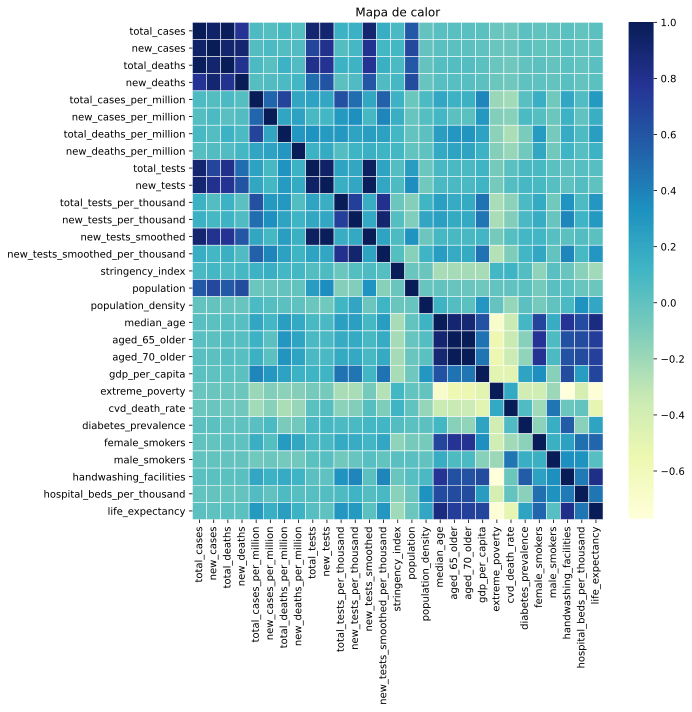

In [9]:
# criar um heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=.5, cmap="YlGnBu")
plt.title("Mapa de calor")
plt.tight_layout()

Outro ponto importante é verificarmos a porcentagem de valores ausentes nas variáveis, para que nossa análise não gere médias ou gráficos errôneos afetados pela falta das mesmas.


In [10]:
# verificar valores ausentes, ordenando pelos maiores valores
# iremos considerar somente variáveis com mais de 50% de dados faltantes
null_series = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
print(null_series[null_series > 0.50])

new_tests                          0.741211
new_tests_per_thousand             0.741211
total_tests_per_thousand           0.714314
total_tests                        0.714314
new_tests_smoothed_per_thousand    0.690464
new_tests_smoothed                 0.690464
tests_units                        0.665731
handwashing_facilities             0.589089
dtype: float64


Podemos verificar que as variáveis numéricas que envolvem a contagem de testes tem a maioria de seus dados não informados.

Aproveitando que fizemos a transformação da coluna `date` para o formato `Datetime`, vamos utilizar a mesma para filtrar os países que tem maior número de casos e mortes na data de 20/06/2020.

In [25]:
# verificar os 10 países com maior número total de casos na data de 20/06/2020
# removemos a primeira coluna pois contabiliza o total mundial
df.loc[df.date == '2020-06-20'].sort_values(by="total_cases", ascending=False)[1:11]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
23895,USA,North America,United States,2020-06-20,2220961.0,29909.0,119112.0,678.0,6709.798,90.359,359.852,2.048,26566553.0,583940.0,80.261,1.764,502362.0,1.518,units unclear,NaN,331002647,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
3431,BRA,South America,Brazil,2020-06-20,1032913.0,54771.0,48954.0,1206.0,4859.409,257.674,230.307,5.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
19117,RUS,Europe,Russia,2020-06-20,569063.0,7972.0,7972.0,182.0,3899.442,54.627,54.627,1.247,16661287.0,339323.0,114.170,2.325,298167.0,2.043,tests performed,NaN,145934460,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58
10687,IND,Asia,India,2020-06-20,395048.0,14516.0,12948.0,375.0,286.266,10.519,9.383,0.272,6616496.0,189869.0,4.795,0.138,158473.0,0.115,samples tested,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66
23721,GBR,Europe,United Kingdom,2020-06-20,301815.0,1346.0,42461.0,173.0,4445.909,19.827,625.475,2.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
18123,PER,South America,Peru,2020-06-20,247925.0,3537.0,7660.0,199.0,7519.294,107.273,232.319,6.035,211997.0,NaN,6.430,NaN,4122.0,0.125,people tested,89.81,32971846,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74
21304,ESP,Europe,Spain,2020-06-20,245938.0,363.0,30240.0,7.0,5260.168,7.764,646.779,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46754783,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
11814,ITA,Europe,Italy,2020-06-20,238011.0,-148.0,34561.0,47.0,3936.550,-2.448,571.617,0.777,4943825.0,54722.0,81.768,0.905,54233.0,0.897,tests performed,NaN,60461828,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
4836,CHL,South America,Chile,2020-06-20,231393.0,6290.0,4093.0,252.0,12104.544,329.040,214.111,13.183,943593.0,20080.0,49.361,1.050,17656.0,0.924,tests performed,NaN,19116209,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18
11028,IRN,Asia,Iran,2020-06-20,200262.0,2615.0,9392.0,120.0,2384.271,31.134,111.819,1.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83992953,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68


Utilizando esse filtro podemos verificar então que nosso país ocupa no dia 20/06/2020 a segunda colocação mundial de casos totais de COVID-19. 

In [26]:
# verificar os 10 países com maior número total de mortes na data de 20/06/2020
# removemos a primeira coluna pois contabiliza o total mundial
df.loc[df.date == '2020-06-20'].sort_values(by="total_deaths", ascending=False)[1:11]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
23895,USA,North America,United States,2020-06-20,2220961.0,29909.0,119112.0,678.0,6709.798,90.359,359.852,2.048,26566553.0,583940.0,80.261,1.764,502362.0,1.518,units unclear,NaN,331002647,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
3431,BRA,South America,Brazil,2020-06-20,1032913.0,54771.0,48954.0,1206.0,4859.409,257.674,230.307,5.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
23721,GBR,Europe,United Kingdom,2020-06-20,301815.0,1346.0,42461.0,173.0,4445.909,19.827,625.475,2.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
11814,ITA,Europe,Italy,2020-06-20,238011.0,-148.0,34561.0,47.0,3936.550,-2.448,571.617,0.777,4943825.0,54722.0,81.768,0.905,54233.0,0.897,tests performed,NaN,60461828,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
21304,ESP,Europe,Spain,2020-06-20,245938.0,363.0,30240.0,7.0,5260.168,7.764,646.779,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46754783,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
8253,FRA,Europe,France,2020-06-20,159452.0,811.0,29617.0,14.0,2442.829,12.425,453.737,0.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65273512,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
15076,MEX,North America,Mexico,2020-06-20,170485.0,5030.0,20394.0,647.0,1322.278,39.013,158.175,5.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
10687,IND,Asia,India,2020-06-20,395048.0,14516.0,12948.0,375.0,286.266,10.519,9.383,0.272,6616496.0,189869.0,4.795,0.138,158473.0,0.115,samples tested,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66
2510,BEL,Europe,Belgium,2020-06-20,60476.0,128.0,9695.0,12.0,5218.119,11.044,836.525,1.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11589616,375.564,41.8,18.571,12.849,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63
11028,IRN,Asia,Iran,2020-06-20,200262.0,2615.0,9392.0,120.0,2384.271,31.134,111.819,1.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83992953,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68


Utilizando esse filtro também podemos verificar então que nosso país ocupa no dia 20/06/2020 a segunda colocação mundial de casos totais de mortes pelo COVID-19.

Aproveitando esses filtros, iremos plotar alguns gráficos. O primeiro será um gráfico de colunas, diminuindo para 5 o número de países exibidos nesse gráfico, ordenado pelo número total de mortos até o momento (20/06/2020).

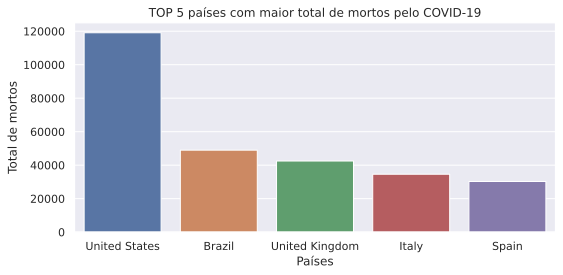

In [27]:
# plotar um gráfico com os 5 países com maior total de mortos pelo COVID-19
top5_total_deaths = df.loc[df.date == '2020-06-20', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(8,4))
sns.set(style="whitegrid")
ax = sns.barplot('location', 'total_deaths', data=top5_total_deaths)
plt.title("TOP 5 países com maior total de mortos pelo COVID-19")
plt.xlabel("Países")
plt.ylabel("Total de mortos")
plt.tight_layout()

Com esse gráfico, podemos constatar que os países com maior total de mortos pelo COVID-19 são:
1. Estados Unidos;
2. Brasil;
3. Reino Unido;
4. Itália;
5. Espanha.

Agora iremos plotar um gráfico de linhas, alterando o indicador para evolução total de casos de COVID-19 no mundo.

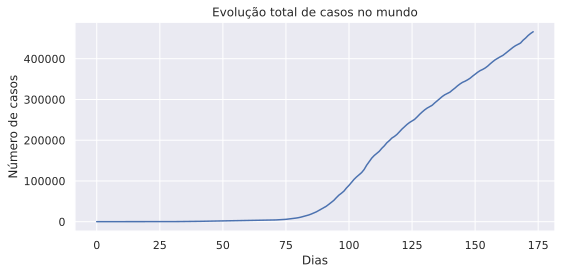

In [28]:
# plotar um gráfico com a evolução total de casos no mundo
sns.set()
fig, ax = plt.subplots(figsize=(8,4))
plt.title("Evolução total de casos no mundo")
plt.xlabel("Dias")
plt.ylabel("Número de casos")
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()
plt.tight_layout()

Notamos com esse gráfico de evolução que a partir do 75º dia começou a elevação do número de casos ao redor do mundo.

Iremos realizar uma comparação entre o PIB dos países X o número total de mortos na data de 20/06/2020.

,location,gdp_per_capita,total_deaths
23895,United States,54225.446,119112.0
3431,Brazil,14103.452,48954.0
23721,United Kingdom,39753.244,42461.0
11814,Italy,35220.084,34561.0
21304,Spain,34272.360,30240.0
...,...,...,...
2891,Bhutan,8708.597,0.0
3074,Bonaire Sint Eustatius and Saba,NaN,0.0
7811,Falkland Islands,NaN,0.0
7732,Faeroe Islands,NaN,0.0


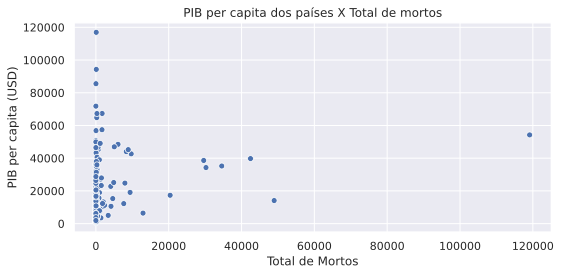

In [30]:
# criar um dataset filtrando pelo dia 20/06/2020, com 3 colunas principais
df_recent = df.loc[df.date == '2020-06-20', ["location","gdp_per_capita","total_deaths"]]
df_recent = df_recent.loc[df_recent.location != 'World']
print_df = df_recent.sort_values(by="total_deaths", ascending=False)

# plotar um gráfico de dispersão com as informações filtradas
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(x="total_deaths", y="gdp_per_capita", data=df_recent)
plt.title("PIB per capita dos países X Total de mortos")
plt.xlabel("Total de Mortos")
plt.ylabel("PIB per capita (USD)")
plt.tight_layout()
display(print_df)

Podemos afirmar com esse gráfico que o país com maior número de mortos não é o país com menor PIB per capita, mas sim o país que tem a mediana do PIB per capita.

Os países com maior e menor PIB per capita encontram-se na faixa inicial de número total de mortos.

**Lembrando** que esses dados são os que foram relatados em nosso *dataset*. Pode ocorrer países que dados não foram relatados e/ou ocorreram poucos testes entre os habitantes desses países.

### Análise Exploratória para o Brasil

Vamos realizar uma análise filtrando somente pelos dados de nosso País. Para isso criaremos uma cópia do *dataset* utilizando um filtro.

In [16]:
# criação de dataframe filtrando pelo Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

Vamos verificar as entradas iniciais e finais desse nosso novo *dataset*:

In [17]:
# listar as 5 primeiras entradas do dataset
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3259,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3260,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3261,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3262,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3263,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [18]:
# listar as 5 últimas entradas do dataset
df_brasil.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3428,BRA,South America,Brazil,2020-06-17,923189.0,34918.0,45241.0,1282.0,4343.205,164.274,212.839,6.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.31,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3429,BRA,South America,Brazil,2020-06-18,955377.0,32188.0,46510.0,1269.0,4494.635,151.431,218.809,5.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.31,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3430,BRA,South America,Brazil,2020-06-19,978142.0,22765.0,47748.0,1238.0,4601.735,107.099,224.634,5.824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.31,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3431,BRA,South America,Brazil,2020-06-20,1032913.0,54771.0,48954.0,1206.0,4859.409,257.674,230.307,5.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3432,BRA,South America,Brazil,2020-06-21,1067579.0,34666.0,49976.0,1022.0,5022.497,163.089,235.115,4.808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [19]:
# identificar o volume de dados do novo DataFrame
print("Variáveis:\t {}\n".format(df_brasil.shape[1]))
print("Entradas:\t {}".format(df_brasil.shape[0]))

Variáveis:	 34

Entradas:	 174


Podemos notar que com o filtro pelo nosso país tivemos a redução para 174 entradas.

Vamos identificar quando foi registrada a primeira morte no território brasileiro.

In [20]:
# verificar a data da primeira morte em território brasileiro
df_brasil.loc[df.total_deaths > 0, ["date"]].date.iloc[0].strftime("%d/%m/%Y")

'18/03/2020'

Aproveitando o filtro acima, vamos contar quantos dias demorou para contabilizarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.

In [21]:
# realizar a subtração do primeiro dia com morte para o primeiro dia do dataset
first_day_dataset = df_brasil.date.iloc[0]
first_day_death = df_brasil.loc[df.total_deaths > 0, ["date"]].date.iloc[0]
result = first_day_death - first_day_dataset
print(result)

78 days 00:00:00


Vamos analisar os gráficos de linha em escalar linear e logarítmica relacionando os casos totais e as mortes totais.

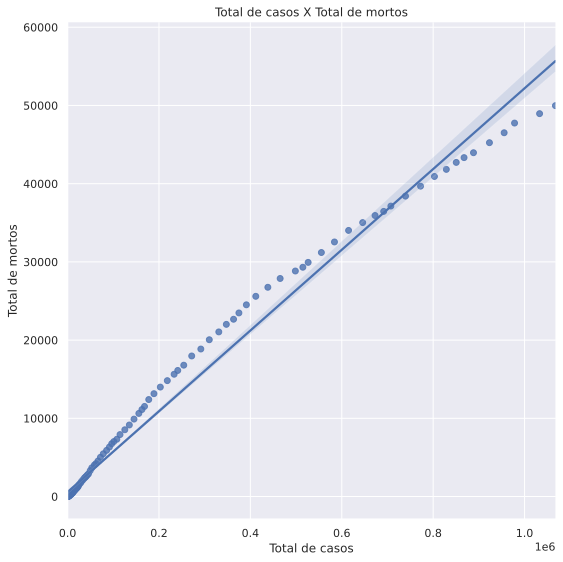

In [46]:
# plotar gráficos de linha em escala linear para os casos totais X mortes totais
sns.set(color_codes=True)

# plotar um gráfico de dispersão com as informações filtradas
ax = sns.lmplot(x="total_cases", y="total_deaths", data=df_brasil, height=8)
plt.title("Total de casos X Total de mortos")
plt.xlabel("Total de casos")
plt.ylabel("Total de mortos")
plt.tight_layout()

Esse gráfico nos leva a concluir que o total de casos apenas não é capaz de trazer informação às variações no total de mortes.

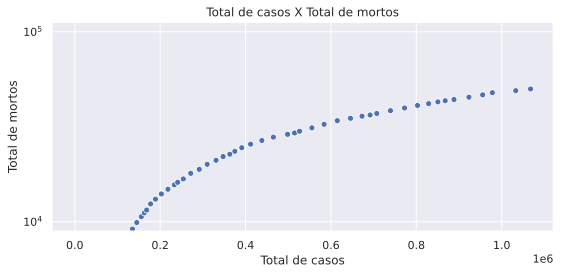

In [48]:
# plotar gráficos de linha em escala logarítmica para os casos totais X mortes totais
sns.set(color_codes=True)

# plotar um gráfico de dispersão com as informações filtradas
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(x="total_cases", y="total_deaths", data=df_brasil)
ax.set_yscale('log')
plt.title("Total de casos X Total de mortos")
plt.xlabel("Total de casos")
plt.ylabel("Total de mortos")
plt.tight_layout()

De acordo com esse gráfico, não há indícios de que a relação entre o total de casos e o número de mortos tenha uma relação diretamente proporcional.

Vamos plotar um gráfico de linha comparando o passar dos dias com o número de novos casos relatados diariamente.

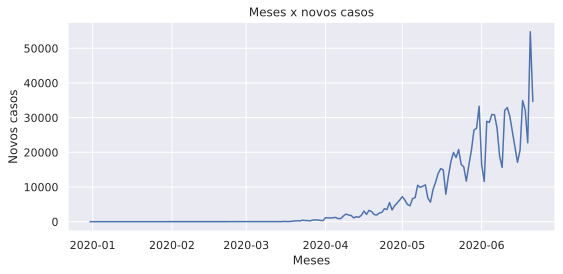

In [50]:
# plotar um gráfico de linha comparando os dias x novos casos
sns.set(color_codes=True)

# plotar um gráfico de dispersão com as informações filtradas
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.lineplot(x="date", y="new_cases", data=df_brasil)
plt.title("Meses x novos casos")
plt.xlabel("Meses")
plt.ylabel("Novos casos")
plt.tight_layout()

Com esse gráfico podemos notar que o crescimento começou a partir do mês de Abril, teve seu pico no final do mês de maio e no momento encontra-se acima dos 20000 novos casos.

## Conclusão

Nesta análise podemos concluir alguns pontos a respeito do COVID-19 no mundo e no Brasil:

* Quantidades de testes (novos, totais) estão com **poucos relatos**;
* Os Estados Unidos ocupam a **primeira** posição em quantidade de casos totais e totais de mortos;
* O Brazil ocupa a **segunda** posição em quantidade de casos totais e totais de mortos;
* Após, temos o **Reino Unido, Itália e França** com maior total de mortos;
* Até **75º dia** relatado em nosso *dataset*, a quantidade de casos no mundo era próximo de 0 (zero);
* O valor do PIB per capita **não influencia** na prevenção do COVID-19;
* O primeiro caso registrado em território brasileiro foi no dia **18/03/2020**;
* O Brasil teve **77 dias com nenhuma morte confirmada** (no 78º dia uma pessoa faleceu);
* As escalas comparativas entre total de casos x total de mortos nos informam que quando alcançamos 800000 casos confirmados, tivemos 40000 mortes (**5%**);
* A partir do mês de abril/2020, houve **um crescente número de casos** no Brasil.

Obrigado pela leitura e me acompanhe no [LinkedIn](https://www.linkedin.com/in/rodrigomariamorgao/) e no [Medium](https://medium.com/@rodrigomariamorgao) para outros artigos e análises. Abraço!